# Data Processing and Joining

We have two datasets that require different levels of processing.  Many of the experimental variables were pre-processed and stored in a .csv file called "summerdata.csv" however the higher-quality data for temperature, wind speed, and wind direction was originally scattered across several folders and files.

The code below first processes the sonic data and then combines it with the summerdata.csv to create a complete dataframe for analysis.

# Processing of the Sonic Data

The sonic data was taken at 20Hz frequency from May 18 to August 19, 2017 and included several measurements such as Ux, Uy, Uz (wind speed and direction), Tsonic and FW (temperature), relative humidity, radiation.  In its raw form, this data is binary and not easily usable.  The data was first converted from its binary state into readable CSVs using the LoggerNet software associated with the Campbell Scientific dataloggers.  These CSVs were scattered among subfolders for each day of the experiment, totaling a size of 48 GB, with data that remained unusable.

The data was then processed with "UTESpac," found at the link below, which reduced the data using 1-minute averages (to match the other experimental data frequency), re-oriented the measurements, and stored the data into a Matlab structure.
https://github.com/derek591/UTESpac

Due to minor differences in the measurement data taken, resulting in different numbers of columns among files, UTESpac was run twice for the two subsets of files with matching numbers of columns, resulting in two output Matlab structures.  UTESpac ran for a total of approximately 2.5 hours to process all files.  Since we only needed two variables from this structure, which contained our wind speed, wind direction, and temperature, Matlab's "csvwrite" function was used as shown below.  

csvwrite('Sonic20Hz.csv',outputStruct.Sonic20Hz) <br>
csvwrite('spdAndDir.csv',outputStruct.spdAndDir)

Four .csv files were generated for the two UTESpac outputs and concatenated using the code below.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# concatenate data into one usable spreadsheet

# "L" = lower sonic at 0.91m
# "M" = middle sonic at 1.829m
# "U" = upper sonic at 2.769m

# for "Sonic20Hz.csv" files
names = ['TIMESTAMP','Ux_0.91','Uy_0.91','Uz_0.91','T_Sonic_L','sonic_diag_0.91',
          'Ux_1.829','Uy_1.829','Uz_1.829','T_Sonic_M','sonic_diag_1.829',
          'Ux_2.769','Uy_2.769','Uz_2.769','T_Sonic_U','sonic_diag_2.769']

namesboth = ['TIMESTAMP','Ux_0.91','Uy_0.91','Uz_0.91','T_Sonic_L','sonic_diag_0.91','FW_L',
          'Ux_1.829','Uy_1.829','Uz_1.829','T_Sonic_M','sonic_diag_1.829','FW_M',
          'Ux_2.769','Uy_2.769','Uz_2.769','T_Sonic_U','sonic_diag_2.769','FW_U']

# for "spdAndDir.csv" files
names2 = ['TIMESTAMP','L direction','L speed','0.91m flag 295<dir<335',
          'M direction','M speed','1.829m flag 295<dir<335',	
          'U direction','U speed','2.769m flag 295<dir<335']

#load in csv for most of the data
dfsonic = pd.read_csv('sonic data/Sonic20Hz_1min.csv',header=None,names=names,index_col=False)
dflongtime = pd.read_csv('sonic data/longtime.csv',header=None,names=['TIME'],parse_dates=True,infer_datetime_format=True)
dflongtime['TIME'] = pd.to_datetime(dflongtime['TIME'],infer_datetime_format=True)
dfsonic['TIMESTAMP'] = dflongtime['TIME'] #replace TIMESTAMP column w/ date-time strings

#plt.plot(x=dfsonic['TIMESTAMP'],y=dfsonic['T_Sonic_L'])

dfspddir = pd.read_csv('sonic data/spdAndDir_1min.csv',header=None,names=names2,index_col=False)
dfspddir['TIMESTAMP'] = dflongtime[['TIME']] #replace TIMESTAMP column w/ date-time strings

#load in csv for last 4 days of the data
dfsonic_bothT = pd.read_csv('sonic data/Sonic20Hz_1min_bothT.csv',header=None,names=namesboth,index_col=False)
dfshorttime = pd.read_csv('sonic data/shorttime.csv',header=None,names=['TIME'],parse_dates=True)
dfshorttime['TIME'] = pd.to_datetime(dfshorttime['TIME'],infer_datetime_format=True)
dfsonic_bothT['TIMESTAMP'] = dfshorttime[['TIME']]

dfspddir_bothT = pd.read_csv('sonic data/spdAndDir_1min_bothT.csv',header=None,names=names2,index_col=False)
dfspddir_bothT['TIMESTAMP'] = dfshorttime[['TIME']]

In [3]:
#%% eliminate all unnecessary columns; keep only temperature columns
dfsonic = dfsonic[['TIMESTAMP','T_Sonic_L','T_Sonic_M','T_Sonic_U']]
dfsonic_bothT = dfsonic_bothT[['TIMESTAMP','T_Sonic_L','FW_L','T_Sonic_M','FW_M','T_Sonic_U','FW_U']]
dfspddir = dfspddir[['TIMESTAMP','L direction','L speed','M direction','M speed','U direction','U speed']]
dfspddir_bothT = dfspddir_bothT[['TIMESTAMP','L direction','L speed','M direction','M speed','U direction','U speed']]

print('dfsonic:\n')
print(dfsonic.head())
print('\n dfsonic_both:\n')
print(dfsonic_bothT.head())
print('\n dfspddir:\n')
print(dfspddir.head())
print('\n dfspddir_both:\n')
print(dfspddir_bothT.head())

dfsonic:

            TIMESTAMP  T_Sonic_L  T_Sonic_M  T_Sonic_U
0 2017-05-18 00:01:00        NaN        NaN        NaN
1 2017-05-18 00:02:00        NaN        NaN        NaN
2 2017-05-18 00:03:00        NaN        NaN        NaN
3 2017-05-18 00:04:00        NaN        NaN        NaN
4 2017-05-18 00:05:00        NaN        NaN        NaN

 dfsonic_both:

            TIMESTAMP  T_Sonic_L  FW_L  T_Sonic_M  FW_M  T_Sonic_U  FW_U
0 2017-08-17 00:01:00        NaN   NaN        NaN   NaN        NaN   NaN
1 2017-08-17 00:02:00        NaN   NaN        NaN   NaN        NaN   NaN
2 2017-08-17 00:03:00        NaN   NaN        NaN   NaN        NaN   NaN
3 2017-08-17 00:04:00        NaN   NaN        NaN   NaN        NaN   NaN
4 2017-08-17 00:05:00        NaN   NaN        NaN   NaN        NaN   NaN

 dfspddir:

            TIMESTAMP  L direction  L speed  M direction  M speed  \
0 2017-05-18 00:01:00          NaN      NaN          NaN      NaN   
1 2017-05-18 00:02:00          NaN      NaN          N

# Adjustment of Temperature Variable within Sonic Data

For the first half of the experiment, temperature was measured by the sonics themselves in a variable called "T_sonic."  This method of measuring temperature can be inaccurate.  For the second half of the experiment, temperature was measured by finewire sensors in a variable called "FW."  This method of measuring temperature is accurate.  During the last 4 days of the experiment, temperature was measured by both methods, adding another column to that subset of the data. The difference between T_sonic and FW is quantified using the last 4 days of the experiment when both measurement methods were present.  

The following code finds this adjustment value, adjusts T_sonic during the first half of the summer, and combines all the sonic data into a single dataset.

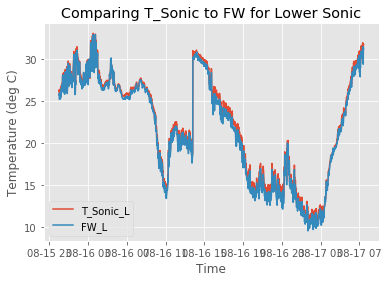

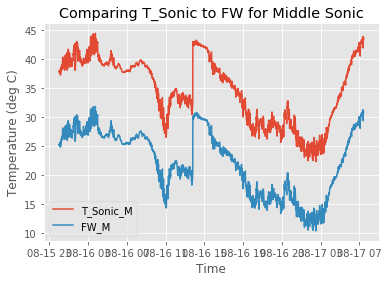

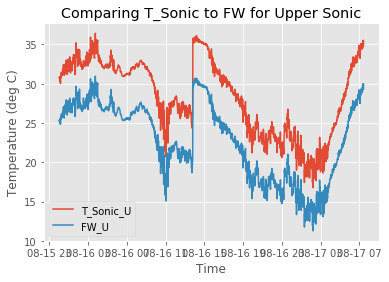

Difference between T_sonic and FW for Lower Sonic
count    1886.000000
mean        0.446177
std         0.210491
min        -0.545000
25%         0.310250
50%         0.447000
75%         0.590000
max         1.237000
Name: diff_L, dtype: float64 

Difference between T_sonic and FW for Middle Sonic
count    1886.000000
mean       12.368353
std         0.218397
min        11.567000
25%        12.256000
50%        12.387000
75%        12.497000
max        13.134000
Name: diff_M, dtype: float64 

Difference between T_sonic and FW for Upper Sonic
count    1886.000000
mean        5.608394
std         0.242970
min         4.698000
25%         5.453000
50%         5.608000
75%         5.778000
max         6.229000
Name: diff_U, dtype: float64 



C:\Users\Connor\Desktop\Jupyter\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Connor\Desktop\Jupyter\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Connor\Desktop\Jupyter\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

In [4]:
#%% finding adjustment value for Tsonic

temp_cols = ['T_Sonic_L','FW_L','T_Sonic_M','FW_M','T_Sonic_U','FW_U']
dftest = dfsonic_bothT.dropna(axis=0, how='all', subset = temp_cols) #drop all rows that contain all NaNs

time = pd.date_range(start='2017-08-16', periods=dftest.shape[0], freq='1min') #create time vector for visualization purposes only

plt.plot(time,dftest['T_Sonic_L'])
plt.plot(time,dftest['FW_L'])
plt.title('Comparing T_Sonic to FW for Lower Sonic')
plt.xlabel('Time')
plt.ylabel('Temperature (deg C)')
plt.legend()
plt.show()

plt.plot(time,dftest['T_Sonic_M'])
plt.plot(time,dftest['FW_M'])
plt.title('Comparing T_Sonic to FW for Middle Sonic')
plt.xlabel('Time')
plt.ylabel('Temperature (deg C)')
plt.legend()
plt.show()

plt.plot(time,dftest['T_Sonic_U'])
plt.plot(time,dftest['FW_U'])
plt.title('Comparing T_Sonic to FW for Upper Sonic')
plt.xlabel('Time')
plt.ylabel('Temperature (deg C)')
plt.legend()
plt.show()

# based on plots above, deltas look constant
# will try calculating constant value, subtracting from T_Sonic
# and plotting results

#add columns of deltas to existing df
dftest['diff_L'] = dftest['T_Sonic_L']-dftest['FW_L']
dftest['diff_M'] = dftest['T_Sonic_M']-dftest['FW_M']
dftest['diff_U'] = dftest['T_Sonic_U']-dftest['FW_U']

print('Difference between T_sonic and FW for Lower Sonic')
print(dftest['diff_L'].describe(),'\n')
print('Difference between T_sonic and FW for Middle Sonic')
print(dftest['diff_M'].describe(),'\n')
print('Difference between T_sonic and FW for Upper Sonic')
print(dftest['diff_U'].describe(),'\n')

On the lower sonic, because the mean and max temperature difference between the two measuremnts T_sonic and Finewire were so small (<1 deg C), no adjustment is needed.

On the middle sonic, the mean temperatue difference is 12.4 deg C and standard deviation was 0.2 deg C, so an adjustment value of 12.4 deg C was chosen.

On the upper sonic, the mean temperatue difference is 5.6 deg C and standard deviation was 0.2 deg C, so an adjustment value of 5.6 deg C was chosen. 


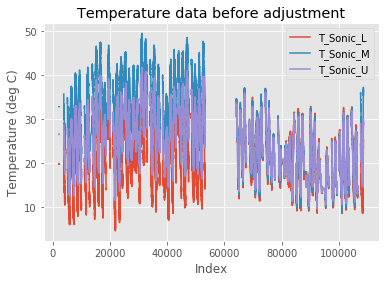

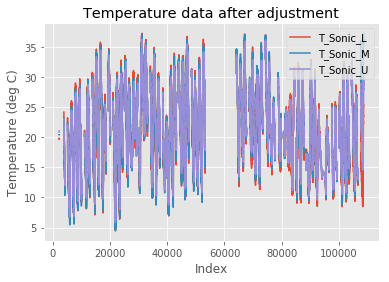

In [5]:
#%% adjust T_sonic_M and T_sonic_U

# visualize data before correction
plt.plot(dfsonic['T_Sonic_L']) #visualize
plt.plot(dfsonic['T_Sonic_M']) #visualize
plt.plot(dfsonic['T_Sonic_U']) #visualize
plt.title('Temperature data before adjustment')
plt.xlabel('Index')
plt.ylabel('Temperature (deg C)')
plt.legend()
plt.show()

#correct first half of data
N = int(dfsonic.shape[0]/2)
dfsonic['T_Sonic_M'][:N] = dfsonic['T_Sonic_M'][:N] - 12.4
dfsonic['T_Sonic_U'][:N] = dfsonic['T_Sonic_U'][:N] - 5.6

plt.plot(dfsonic['T_Sonic_L']) #visualize
plt.plot(dfsonic['T_Sonic_M']) #visualize
plt.plot(dfsonic['T_Sonic_U']) #visualize
plt.title('Temperature data after adjustment')
plt.xlabel('Index')
plt.ylabel('Temperature (deg C)')
plt.legend()
plt.show()

In [6]:
#%% swap contents of T_Sonic and FW columns because we are going to disregard T_sonic and replace everything with an adjusted temperature
dfsonic_bothT[['T_Sonic_L', 'FW_L']] = dfsonic_bothT[['FW_L', 'T_Sonic_L']]
dfsonic_bothT[['T_Sonic_M', 'FW_M']] = dfsonic_bothT[['FW_M', 'T_Sonic_M']]
dfsonic_bothT[['T_Sonic_U', 'FW_U']] = dfsonic_bothT[['FW_U', 'T_Sonic_U']]

dfsoniclast = dfsonic_bothT[['TIMESTAMP','T_Sonic_L','T_Sonic_M','T_Sonic_U']] #get rid of inaccurate measurements now called 'FW'

In [7]:
#%% concatenate sonic data

#concatenate vertically
dftempcc = pd.concat([dfsonic, dfsoniclast], ignore_index=True)
print('Concatenated temperature dataframe shape: ',dftempcc.shape)

dfsdcc = pd.concat([dfspddir, dfspddir_bothT], ignore_index=True)
print('Concatenated spd+dir dataframe shape: ',dftempcc.shape)

#concatenate horizontally
#df = pd.concat([dfsdcc, dftempcc], axis=1, verify_integrity=True)  #verify that TIMESTAMP col is same: it is
#df = pd.merge(left=dfsdcc, right=dftempcc, how='left', on='TIMESTAMP')
dfson = pd.concat([dfsdcc, dftempcc[['T_Sonic_L', 'T_Sonic_M', 'T_Sonic_U']]], axis=1)
#df = df.drop(df.columns[7], axis=1)#drop 2nd TIMESTAMP column
print('Concatenated, complete dataframe shape: ',dfson.shape,'\n')
print(dfson.head())
print('\n Dataframe Info: \n',dfson.describe())

Concatenated temperature dataframe shape:  (113760, 4)
Concatenated spd+dir dataframe shape:  (113760, 4)
Concatenated, complete dataframe shape:  (113760, 10) 

            TIMESTAMP  L direction  L speed  M direction  M speed  \
0 2017-05-18 00:01:00          NaN      NaN          NaN      NaN   
1 2017-05-18 00:02:00          NaN      NaN          NaN      NaN   
2 2017-05-18 00:03:00          NaN      NaN          NaN      NaN   
3 2017-05-18 00:04:00          NaN      NaN          NaN      NaN   
4 2017-05-18 00:05:00          NaN      NaN          NaN      NaN   

   U direction  U speed  T_Sonic_L  T_Sonic_M  T_Sonic_U  
0          NaN      NaN        NaN        NaN        NaN  
1          NaN      NaN        NaN        NaN        NaN  
2          NaN      NaN        NaN        NaN        NaN  
3          NaN      NaN        NaN        NaN        NaN  
4          NaN      NaN        NaN        NaN        NaN  

 Dataframe Info: 
         L direction       L speed   M direction  

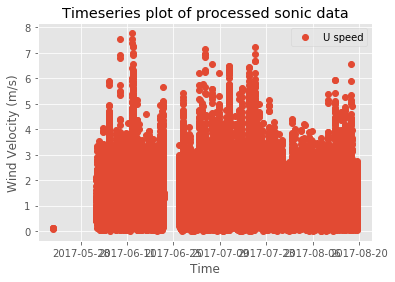

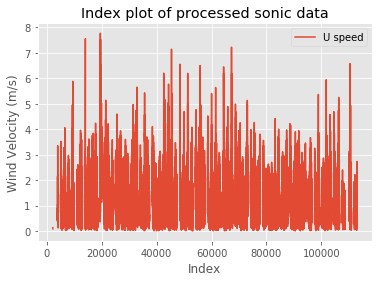

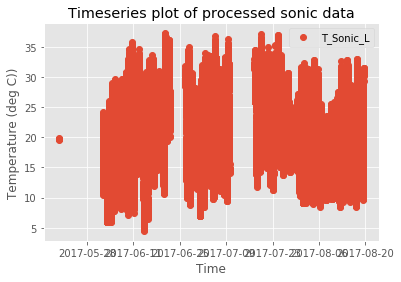

In [8]:
#%% plots: visualize processed sonic data
plt.plot_date(x=dfson['TIMESTAMP'],y=dfson['U speed'])
plt.title('Timeseries plot of processed sonic data')
plt.xlabel('Time')
plt.ylabel('Wind Velocity (m/s)')
plt.legend()
plt.show()

plt.plot(dfson['U speed'])
plt.title('Index plot of processed sonic data')
plt.xlabel('Index')
plt.ylabel('Wind Velocity (m/s)')
plt.legend()
plt.show()

plt.plot_date(x=dfson['TIMESTAMP'],y=dfson['T_Sonic_L'])
plt.title('Timeseries plot of processed sonic data')
plt.xlabel('Time')
plt.ylabel('Temperature (deg C))')
plt.legend()
plt.show()

# Processing and Joining with "summerdata.csv"

The following code joins the two datasets wherever TIMESTAMP exists in both datasets.

In [9]:
data = pd.read_csv('summerdata.csv')
data = data.rename(columns={"Time":"TIMESTAMP"})

In [10]:
#convert TIMESTAMP column to datetime type
dfsummertime = pd.read_csv('summertimestamp.csv',header=None,names=['TIME'],parse_dates=True,infer_datetime_format=True)
dfsummertime['TIME'] = pd.to_datetime(dfsummertime['TIME'],infer_datetime_format=True)
data['TIMESTAMP'] = dfsummertime['TIME'] #replace TIMESTAMP column w/ date-time strings
data2017 = data[(data['TIMESTAMP']>'2017-01-01')] #only select data from 2017
#data2017['TIMESTAMP'] = pd.to_datetime(data2017['TIMESTAMP'],infer_datetime_format=True)
#data2017 = data2017.reset_index()

print('summerdata:')
print(data2017.head())
#print('ensure TIMESTAMP column is correct datetime data type: \n',data2017['TIMESTAMP'].describe())


summerdata:
              TIMESTAMP  ApogSWup  ApogSWdn  ApogLWup  ApogLWdn  CNR_SWup  \
243 2017-05-18 13:18:00       NaN       NaN       NaN       NaN       NaN   
244 2017-05-18 13:19:00       NaN       NaN       NaN       NaN     1.106   
245 2017-05-18 13:20:00       NaN       NaN       NaN       NaN     1.175   
246 2017-05-18 13:21:00       NaN       NaN       NaN       NaN     1.032   
247 2017-05-18 13:22:00       NaN       NaN       NaN       NaN     1.370   

     CNR_SWdn  CNR_LWup  CNR_LWdn  HMP_TempC ...  TempTmid    TempT  CupWS_ms  \
243       NaN       NaN       NaN        NaN ...    59.613  61.9226       NaN   
244    -0.045     410.2    418.80    15.9477 ...       NaN      NaN     2.867   
245     0.083     410.3    418.50    16.0431 ...       NaN      NaN     2.867   
246     0.030     410.5    418.20    16.0593 ...       NaN      NaN     2.867   
247     0.427     411.7    419.15    16.4896 ...       NaN      NaN     2.867   

     CupWD  CupWD_SD  FinewireT_Top  F

In [11]:
#%% merge data2017 with dfson

#dfson['TIMESTAMP']=dfson['TIMESTAMP'].replace(second=0, microsecond=0)
#data2017['TIMESTAMP'].replace(second=0, microsecond=0)
#data2017['TIMESTAMP']=data2017['TIMESTAMP'].strftime('%Y-%m-%d %H:%M')

# ensure both 'TIMESTAMP' columns are in matching format
#data2017['TIMESTAMP'] = data2017['TIMESTAMP'].apply(lambda dt: dt.replace(second=0, microsecond=0))
data2017['TIMESTAMP'] = data2017['TIMESTAMP'].apply(lambda dt: dt.strftime('%Y-%m-%d %H:%M'))

#dfson['TIMESTAMP'] = dfson['TIMESTAMP'].apply(lambda dt: dt.replace(second=0, microsecond=0))
dfson['TIMESTAMP'] = dfson['TIMESTAMP'].apply(lambda dt: dt.strftime('%Y-%m-%d %H:%M'))

#intersection = np.intersect1d(dfson['TIMESTAMP'], data2017['TIMESTAMP'])
#difference = np.setdiff1d(dfson['TIMESTAMP'], data2017['TIMESTAMP'])

#dfjoined = df.join(data2017, on='TIMESTAMP',how='outer',lsuffix='_left')
#dfjoined = pd.merge(data2017, df, how='inner', on=['TIMESTAMP'])

dfjoined = data2017.set_index('TIMESTAMP').join(dfson.set_index('TIMESTAMP')) #join the two datasets
print('joined dataset shape:',dfjoined.shape)
print('Joined DF created by joining df of shape:',dfson.shape,'and data2017 of shape:',data2017.shape)
print('# rows in common:',dfjoined.shape[0],' out of: ',dfson.shape[0])
print('Joined DF:',dfjoined.head())

C:\Users\Connor\Desktop\Jupyter\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


joined dataset shape: (108474, 43)
Joined DF created by joining df of shape: (113760, 10) and data2017 of shape: (107118, 35)
# rows in common: 108474  out of:  113760
Joined DF:                   ApogSWup  ApogSWdn  ApogLWup  ApogLWdn  CNR_SWup  CNR_SWdn  \
TIMESTAMP                                                                      
2017-05-18 13:18       NaN       NaN       NaN       NaN       NaN       NaN   
2017-05-18 13:19       NaN       NaN       NaN       NaN     1.106    -0.045   
2017-05-18 13:20       NaN       NaN       NaN       NaN     1.175     0.083   
2017-05-18 13:21       NaN       NaN       NaN       NaN     1.032     0.030   
2017-05-18 13:22       NaN       NaN       NaN       NaN     1.370     0.427   

                  CNR_LWup  CNR_LWdn  HMP_TempC    HMP_RH    ...       h  \
TIMESTAMP                                                    ...           
2017-05-18 13:18       NaN       NaN        NaN       NaN    ...     NaN   
2017-05-18 13:19     410.2    41

In [12]:
#%% eliminate unnecessary columns: 'BattV', 'Btemp1',
#       'Btemp2', 'Btemp3', 'Btemp4', 'Btemp5', 'Btemp6', 'TempBmid', 'Btemp14',
#       'Btemp15', 'Btemp16', 'TempB', 'Btemp22', 'Btemp23', 'TempTmid',
#       'TempT', 'FinewireT_Top', 'FinewireT_Mid', 'FinewireT_Bot',

      # removing FW temperature and local solar panel temperatures from summerdata.csv
cols = ['ApogSWup', 'ApogSWdn', 'ApogLWup', 'ApogLWdn', 'CNR_SWup', 'CNR_SWdn',
       'CNR_LWup', 'CNR_LWdn', 'HMP_TempC', 'HMP_RH', 'CupWS_ms', 'CupWD', 'CupWD_SD', 'q', 'h', 'L direction', 'L speed',
       'M direction', 'M speed', 'U direction', 'U speed', 'T_Sonic_L',
       'T_Sonic_M', 'T_Sonic_U']
dftrunc = dfjoined[cols]

Now that we have joined the datasets, we can start to eliminate extraneous data by removing NaN values.

# Data Splicing

In [13]:
#%% eliminate rows with all NaNs
temp_cols = dftrunc.columns
df = dftrunc.dropna(axis=0, how='any', subset = temp_cols) #drop all rows that contain any NaNs

print('Concatenated, complete dataframe shape: ',df.shape,'\n')
print('Percentage of data lost due to NaNs: ',(100-(df.shape[0]/dftrunc.shape[0]*100)))
print(df.head())

Concatenated, complete dataframe shape:  (44266, 24) 

Percentage of data lost due to NaNs:  59.19206445784243
                  ApogSWup  ApogSWdn  ApogLWup  ApogLWdn  CNR_SWup  CNR_SWdn  \
TIMESTAMP                                                                      
2017-06-09 13:32  395.7340   32.9280  380.9849  496.8981     471.0     77.30   
2017-06-09 13:33  399.1788   32.0129  381.0941  496.4890     466.7     76.97   
2017-06-09 13:34  404.0784   31.9219  380.6084  496.3102     463.5     76.16   
2017-06-09 13:35  410.1705   30.9715  380.2193  495.7003     461.1     76.07   
2017-06-09 13:50  455.7285   32.1368  378.6826  493.9391     512.0     83.00   

                  CNR_LWup  CNR_LWdn  HMP_TempC   HMP_RH    ...      \
TIMESTAMP                                                   ...       
2017-06-09 13:32     363.6     480.4    29.9599  16.4908    ...       
2017-06-09 13:33     363.2     480.7    29.8747  15.5840    ...       
2017-06-09 13:34     363.4     479.9    29.8

# Exploratory Analysis of Complete Dataset

The following code visually explores the data available to us in the complete dataset.

In [14]:
plt.plot(df['U speed'])
plt.plot(df['M speed'])
plt.plot(df['L speed']) #this might be best to use bc it's at the level of the solar panels and most conservative
plt.title('Wind Speed at 3 Sonic Heights')
plt.xlabel('Index')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.show()

#I don't know why this is plotting twice.

KeyboardInterrupt: 

In [15]:
df.head()

,ApogSWup,ApogSWdn,ApogLWup,ApogLWdn,CNR_SWup,CNR_SWdn,CNR_LWup,CNR_LWdn,HMP_TempC,HMP_RH,...,h,L direction,L speed,M direction,M speed,U direction,U speed,T_Sonic_L,T_Sonic_M,T_Sonic_U
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2017-06-09 13:32,395.7340,32.9280,380.9849,496.8981,471.0,77.30,363.6,480.4,29.9599,16.4908,...,7.796438,212.54,0.62555,213.43,1.05240,212.61,1.41010,29.983,29.651,29.328
2017-06-09 13:33,399.1788,32.0129,381.0941,496.4890,466.7,76.97,363.2,480.7,29.8747,15.5840,...,7.973374,199.53,0.63695,204.45,0.97280,204.03,1.05790,29.902,29.723,29.483
2017-06-09 13:34,404.0784,31.9219,380.6084,496.3102,463.5,76.16,363.4,479.9,29.8498,14.3727,...,8.134817,200.62,0.81070,209.87,1.10230,205.28,1.23180,29.831,29.652,29.439
2017-06-09 13:35,410.1705,30.9715,380.2193,495.7003,461.1,76.07,362.7,478.0,29.8478,15.1911,...,8.389939,244.20,0.46052,247.95,0.77273,240.82,0.98166,30.099,29.927,29.603
2017-06-09 13:50,455.7285,32.1368,378.6826,493.9391,512.0,83.00,358.5,481.3,29.9836,14.7437,...,10.599599,184.72,0.70582,160.40,0.81960,149.01,1.19680,29.907,29.710,29.522


In [16]:
df.columns

Index(['ApogSWup', 'ApogSWdn', 'ApogLWup', 'ApogLWdn', 'CNR_SWup', 'CNR_SWdn',
       'CNR_LWup', 'CNR_LWdn', 'HMP_TempC', 'HMP_RH', 'CupWS_ms', 'CupWD',
       'CupWD_SD', 'q', 'h', 'L direction', 'L speed', 'M direction',
       'M speed', 'U direction', 'U speed', 'T_Sonic_L', 'T_Sonic_M',
       'T_Sonic_U'],
      dtype='object')

In [17]:
df.to_csv('Final_data.csv')